In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

#### Load CSV files

In [2]:
covid_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('vaccine_with_protocol.csv')
neighborhood = pd.read_csv('neighborhoods.csv')

#### Convert Values

In [3]:
covid_df.Zip = covid_df.Zip.astype('Int64')
vaccine_df.zipcode = vaccine_df.zipcode.astype('Int64')
vaccine_df.count_given = vaccine_df.count_given.astype('float')
vaccine_df.dose_nbr = vaccine_df.dose_nbr.astype('Int64')
neighborhood.zip = neighborhood.zip.astype('str')

In [4]:
covid_df.Zip = covid_df.Zip.astype('str')
vaccine_df.zipcode = vaccine_df.zipcode.astype('str')

In [5]:
neighborhood.drop(columns='neighborhood2', axis = 1, inplace=True)

#### Rename Columns

In [6]:
covid_df.columns = ['date', 'zip', 'cases']
vaccine_df.columns = ['date', 'zip', 'vacc', 'dose_nbr', 'protocol']

#### Convert DateTime

In [7]:
covid_df.date = pd.to_datetime(covid_df.date)
vaccine_df.date = pd.to_datetime(vaccine_df.date)

#### Filter Out Second Vaccine Doses

In [8]:
vaccine_df = vaccine_df[vaccine_df['dose_nbr'] == 1].reset_index()

In [9]:
# vaccine_df

#### Group Total Covid and Total Vaccine Count By Zip

#group by zipcode to get total cases per zipcode
df2 = C_count.groupby(['Zip'],as_index=False)['Cases'].sum()
df2

In [10]:
covid_df_g = covid_df.groupby(['zip'], as_index=False)['cases'].sum()
vaccine_df_g = vaccine_df.groupby(['zip'], as_index=False)['vacc'].sum()

In [11]:
covid_df_g.cases.sum()

93619

In [12]:
vaccine_df_g.vacc.sum()

220038.0

#### Drop Null Zips And Rename DF

In [13]:
# covid_df_g.tail()

In [14]:
# vaccine_df_g.tail()

In [15]:
# covid_zip_perc = covid_df_g.drop([30,31])
# vaccine_zip_perc = vaccine_df_g.drop([30,31])

In [16]:
# covid_zip_perc.tail()

In [17]:
# vaccine_zip_perc.tail()

#### Merging Covid By Zip and Vaccine By Zip

In [18]:
c_v_zip = pd.merge(neighborhood, covid_df_g, how='inner', on='zip')

In [19]:
c_v_zip = pd.merge(c_v_zip, vaccine_df_g, how='inner', on='zip')

In [20]:
c_v_zip

,zip,neighborhood,cases,vacc
0,37013,Antioch,13354,18465.0
1,37027,Brentwood,231,352.0
2,37069,Franklin,16,50.0
3,37072,Goodlettesville,2984,8460.0
4,37076,South Hermitage,4279,11113.0
5,37080,Joelton,574,1970.0
6,37115,Madison,4574,8520.0
7,37138,Old Hickory,2359,7152.0
8,37189,White's Creek,479,1056.0
9,37201,Downtown,299,576.0


#### Percentage of COVID By Zip and Percentage of Vaccines By Zip


In [21]:
# covid_zip_perc['total_cases'] = covid_zip_perc.cases.sum()
# covid_zip_perc['perc_cases'] = covid_zip_perc.cases / covid_zip_perc.cases.sum()
# covid_zip_perc = covid_zip_perc.sort_values('perc_cases', ascending = False)
# covid_zip_perc = covid_zip_perc.style.format({'perc_cases': "{:.3%}"})

In [22]:
# c_v_zip['perc_cases'] = round(c_v_zip.cases / c_v_zip.cases.sum() * 100,2)
# c_v_zip['perc_v'] = round(c_v_zip.v_count / c_v_zip.v_count.sum() * 100, 2)

In [23]:
# covid_zip_perc.head()

In [24]:
# c_v_zip.head()

#### Create Month_Year Column

In [25]:
vaccine_df2 = vaccine_df
covid_df2 = covid_df

In [26]:
vaccine_df2['month'] = vaccine_df2['date'].dt.month
vaccine_df2['year'] = vaccine_df2['date'].dt.year
covid_df2['month'] = covid_df2['date'].dt.month
covid_df2['year'] = covid_df2['date'].dt.year

In [27]:
vaccine_df2['month_year'] = vaccine_df2['month'].map(str) + '-' + vaccine_df2['year'].map(str)
covid_df2['month_year'] = covid_df2['month'].map(str) + '-' + covid_df2['year'].map(str)

In [28]:
covid_df = covid_df[['zip', 'month_year', 'cases']]
vaccine_df = vaccine_df[['month_year', 'zip', 'vacc', 'dose_nbr', 'protocol']]

In [29]:
v_my_g = vaccine_df2.groupby(['zip'])
c_my_g = covid_df2.groupby(['zip'])

#### Load Household Income

Read in Excel file and then skip the first row which is a title in the excel file
Skip rows allows that. We are then pulling in two headers since this excel has Zip and 'Value & Error'
We can choose different excel sheets Sheet_name = 0 is actual data and Sheet_name =1 is the second percentage

In [30]:
income_df = pd.read_excel("household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_df = income_df[income_df.columns.drop(list(income_df.filter(regex='Error')))]
income_df.columns = income_df.columns.droplevel(1)
income_clean=income_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [31]:
# income_clean.info()

#### Load Sex_Age Data

In [32]:
sex_age_df = pd.read_excel("sex_by_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
sex_age_df = sex_age_df[sex_age_df.columns.drop(list(sex_age_df.filter(regex='Error')))]
sex_age_df.columns = sex_age_df.columns.droplevel(1)
sex_age_clean = sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [33]:
# sex_age_clean

In [34]:
# sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index()

#### Load Ethnicity Data

In [35]:
ethnicity_df = pd.read_excel("ethnicity.xlsx", skiprows = 1, header=[0,1], sheet_name=0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)
ethnicity_df_clean = ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [36]:
# ethnicity_df_clean

In [37]:
# ethnicity_df_clean.nunique(axis=0)

#### Load and Clean Up Ethnicity Data

In [38]:
ethnicity_perc = pd.read_excel("ethnicity.xlsx", skiprows = 1, header=[0,1], sheet_name=1)
ethnicity_perc = ethnicity_perc[ethnicity_perc.columns.drop(list(ethnicity_perc.filter(regex='Error')))]
ethnicity_perc.columns = ethnicity_perc.columns.droplevel(1)
ethnicity_perc = ethnicity_perc.drop([1,9,10,12,13,14,15,16,17,18,19,20,21])

In [39]:
ethnicity_perc = ethnicity_perc.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [40]:
ethnicity_perc 

Unnamed: 0_level_0,zip,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Hispanic or Latino:
0,37010,1.0,0.906565,0.049335,0.000403,0.005437,0.0,0.0,0.005437,0.032823
1,37012,1.0,0.938215,0.03341,0.0,0.001373,0.0,0.0,0.003661,0.023341
2,37013,1.0,0.409234,0.339803,0.00097,0.043394,0.0,0.003819,0.031162,0.171617
3,37014,1.0,0.946032,0.006349,0.0,0.016578,0.0,0.0,0.012698,0.018342
4,37015,1.0,0.896802,0.017209,0.008322,0.006057,0.0,0.000283,0.020549,0.050778
...,...,...,...,...,...,...,...,...,...,...
113,38552,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,38560,1.0,0.930249,0.0,0.001423,0.043416,0.0,0.0,0.024911,0.0
115,38563,1.0,0.939003,0.041056,0.0,0.003812,0.0,0.011437,0.004692,0.0
116,38567,1.0,0.89781,0.0,0.0,0.0,0.0,0.0,0.065693,0.036496


In [41]:
# ethnicity_perc = ethnicity_perc.drop(labels=[1,9,10,12,13,14,15,16,17,18,19,20,21], axis=1)

In [42]:
ethnicity_perc = ethnicity_perc.rename(columns={'Total:':'total', 'White alone' : 'White', 'Black or African American alone': 'Black', 'American Indian and Alaska Native alone': 'American Indian', 'Asian alone': 'Asian', 'Native Hawaiian and Other Pacific Islander alone':'Pacific Islander', 'Some other race alone': 'Other',  'Two or more races:': 'Multi-racial', 'Hispanic or Latino:': 'Hispanic'})

In [43]:
ethnicity_perc

Unnamed: 0_level_0,zip,total,White,Black,American Indian,Asian,Pacific Islander,Other,Multi-racial,Hispanic
0,37010,1.0,0.906565,0.049335,0.000403,0.005437,0.0,0.0,0.005437,0.032823
1,37012,1.0,0.938215,0.03341,0.0,0.001373,0.0,0.0,0.003661,0.023341
2,37013,1.0,0.409234,0.339803,0.00097,0.043394,0.0,0.003819,0.031162,0.171617
3,37014,1.0,0.946032,0.006349,0.0,0.016578,0.0,0.0,0.012698,0.018342
4,37015,1.0,0.896802,0.017209,0.008322,0.006057,0.0,0.000283,0.020549,0.050778
...,...,...,...,...,...,...,...,...,...,...
113,38552,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,38560,1.0,0.930249,0.0,0.001423,0.043416,0.0,0.0,0.024911,0.0
115,38563,1.0,0.939003,0.041056,0.0,0.003812,0.0,0.011437,0.004692,0.0
116,38567,1.0,0.89781,0.0,0.0,0.0,0.0,0.0,0.065693,0.036496


In [44]:
ethnicity_perc.iloc[:,1:] = round(ethnicity_perc.iloc[:,1:] * 100, 2)
ethnicity_perc.head()

Unnamed: 0_level_0,zip,total,White,Black,American Indian,Asian,Pacific Islander,Other,Multi-racial,Hispanic
0,37010,100.0,90.656464,4.933548,0.040274,0.543697,0.0,0.0,0.543697,3.28232
1,37012,100.0,93.82151,3.340961,0.0,0.1373,0.0,0.0,0.366133,2.334096
2,37013,100.0,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
3,37014,100.0,94.603175,0.634921,0.0,1.657848,0.0,0.0,1.269841,1.834215
4,37015,100.0,89.680159,1.720917,0.832154,0.605718,0.0,0.028305,2.054911,5.077838


In [45]:
# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(ethnicity_perc['zip'],ethnicity_perc['White'], color='hotpink')

#### Total Population From Ethnicity DF

In [46]:
pop_by_zip = ethnicity_df_clean[['zip', 'Total:']]
pop_by_zip = pop_by_zip.rename(columns={'Total:': 'total'})

In [47]:
pop_by_zip.dtypes

Unnamed: 0_level_0
zip      object
total     int64
dtype: object

#### Merge COVID DF to Ethnicity DF

In [48]:
perc_covid = pd.merge(covid_df_g, pop_by_zip, how='inner', on='zip')

In [49]:
perc_covid['perc'] = perc_covid.cases / perc_covid.total
perc_covid.rename(columns = {'total': 'pop_total'}, inplace = True)
perc_covid = perc_covid.sort_values('perc', ascending = False)
# perc_covid = perc_covid.style.format({'perc': "{:.3%}"})

In [50]:
perc_covid['perc_of_pop'] = perc_covid.pop_total / perc_covid.pop_total.sum() * 100

In [51]:
perc_covid = perc_covid.sort_values('perc', ascending = False)

In [52]:
perc_covid.shape

(30, 5)

In [53]:
perc_covid.head()
# perc_covid[perc_covid['zip'] == '37214']

,zip,cases,pop_total,perc,perc_of_pop
20,37213,65,95,0.684211,0.012169
26,37219,270,1154,0.233969,0.147825
10,37203,3346,15091,0.221722,1.933120
29,37228,310,1615,0.191950,0.206878
9,37201,299,1619,0.184682,0.207390


In [54]:
# Zipcodes with Highest Perc of Covid / Breakdown

# 37213 - Industrial Corridor
# 37219 - Downtown
# 37203 - Gulch/Westend
# 37228 - Metrocenter
# 37201 - Downtown
# 37013 - Antioch
#

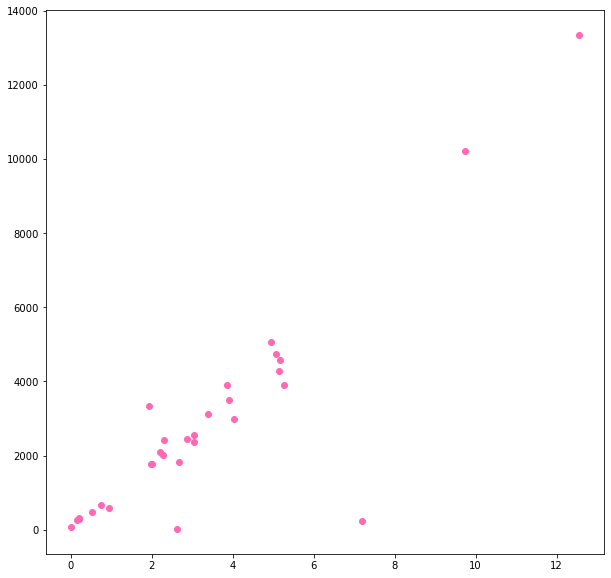

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(perc_covid['perc_of_pop'],perc_covid['cases'], color='hotpink')

#### Merge COVID/Vaccine DF to Ethnicity DF

In [56]:
c_v_pop_zip = pd.merge(c_v_zip, pop_by_zip, how='inner', on='zip')
c_v_pop_zip.rename(columns = {'total': 'pop_total'}, inplace = True)
c_v_pop_zip['perc_cases'] = round(c_v_pop_zip.cases / c_v_pop_zip.pop_total * 100, 2)
c_v_pop_zip['perc_vacc'] = round(c_v_pop_zip.vacc / c_v_pop_zip.pop_total * 100, 2)
c_v_pop_zip['perc_of_pop'] = round(c_v_pop_zip.pop_total / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_cases_by_pop'] = round(c_v_pop_zip.cases / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_vaccines_by_pop'] = round(c_v_pop_zip.vacc / c_v_pop_zip.pop_total.sum() * 100,2)

In [57]:
c_v_pop_zip.sort_values('zip', ascending=True, inplace=False)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
1,37027,Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05
2,37069,Franklin,16,50.0,20467,0.08,0.24,2.62,0.00,0.01
3,37072,Goodlettesville,2984,8460.0,31492,9.48,26.86,4.03,0.38,1.08
4,37076,South Hermitage,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42
5,37080,Joelton,574,1970.0,7394,7.76,26.64,0.95,0.07,0.25
6,37115,Madison,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09
7,37138,Old Hickory,2359,7152.0,23784,9.92,30.07,3.05,0.30,0.92
8,37189,White's Creek,479,1056.0,4016,11.93,26.29,0.51,0.06,0.14
9,37201,Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07


In [58]:
pop_by_zip.shape

(118, 2)

In [59]:
c_v_pop_zip.shape

(30, 10)

#### Highest Population Percentage by Zip

In [60]:
c_v_pop_zip.sort_values('perc_of_pop', ascending=False, inplace=False).head(7)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
18,37211,Crieve Hall,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46
1,37027,Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05
28,37221,Bellevue,3910,17222.0,41017,9.53,41.99,5.25,0.50,2.21
6,37115,Madison,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09
4,37076,South Hermitage,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42
14,37207,North Nashville,4729,9255.0,39544,11.96,23.40,5.07,0.61,1.19


#### Highest Number of Cases

In [61]:
c_v_pop_zip.sort_values('cases', ascending=False, inplace=False).head(10)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
18,37211,Crieve Hall,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46
16,37209,Sylvan Park,5072,13600.0,38664,13.12,35.17,4.95,0.65,1.74
14,37207,North Nashville,4729,9255.0,39544,11.96,23.40,5.07,0.61,1.19
6,37115,Madison,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09
4,37076,South Hermitage,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42
28,37221,Bellevue,3910,17222.0,41017,9.53,41.99,5.25,0.50,2.21
24,37217,South Hermitage,3907,5837.0,30146,12.96,19.36,3.86,0.50,0.75
21,37214,Donelson,3508,9198.0,30528,11.49,30.13,3.91,0.45,1.18
10,37203,Music Row,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03


#### Highest Perct of Vacc By Zip

In [62]:
c_v_pop_zip.sort_values('perc_vacc', ascending=False, inplace=False).head(15)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
20,37213,East Nashville - Industrial,65,72.0,95,68.42,75.79,0.01,0.01,0.01
12,37205,Belle Meade,2566,14666.0,23790,10.79,61.65,3.05,0.33,1.88
26,37219,Capitol Hill,270,638.0,1154,23.40,55.29,0.15,0.03,0.08
27,37220,Oak Hill,656,3239.0,5880,11.16,55.09,0.75,0.08,0.41
22,37215,Forest Hills,2438,12132.0,22379,10.89,54.21,2.87,0.31,1.55
10,37203,Music Row,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03
28,37221,Bellevue,3910,17222.0,41017,9.53,41.99,5.25,0.50,2.21
11,37204,Belmont,1786,6410.0,15452,11.56,41.48,1.98,0.23,0.82
29,37228,Metro Center,310,655.0,1615,19.20,40.56,0.21,0.04,0.08
23,37216,East Nashville,2011,7230.0,17848,11.27,40.51,2.29,0.26,0.93


#### Highest Percentage of Cases By Zip

In [63]:
c_v_pop_zip.sort_values('perc_cases', ascending=False, inplace=False).head(10)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
20,37213,East Nashville - Industrial,65,72.0,95,68.42,75.79,0.01,0.01,0.01
26,37219,Capitol Hill,270,638.0,1154,23.40,55.29,0.15,0.03,0.08
10,37203,Music Row,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03
29,37228,Metro Center,310,655.0,1615,19.20,40.56,0.21,0.04,0.08
9,37201,Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
15,37208,Germantown,2428,5526.0,18011,13.48,30.68,2.31,0.31,0.71
18,37211,Crieve Hall,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46
16,37209,Sylvan Park,5072,13600.0,38664,13.12,35.17,4.95,0.65,1.74
24,37217,South Hermitage,3907,5837.0,30146,12.96,19.36,3.86,0.50,0.75


#### Merge Zip and Neighborhoods

In [64]:
c_v_pop_zip['z_n']= c_v_pop_zip['zip']+ '\n' + c_v_pop_zip['neighborhood']
c_v_pop_zip['n_z']= c_v_pop_zip['neighborhood']+ '\n' + c_v_pop_zip['zip']
c_v_pop_zip.head(10)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop,z_n,n_z
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37,37013\nAntioch,Antioch\n37013
1,37027,Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
2,37069,Franklin,16,50.0,20467,0.08,0.24,2.62,0.00,0.01,37069\nFranklin,Franklin\n37069
3,37072,Goodlettesville,2984,8460.0,31492,9.48,26.86,4.03,0.38,1.08,37072\nGoodlettesville,Goodlettesville\n37072
4,37076,South Hermitage,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42,37076\nSouth Hermitage,South Hermitage\n37076
5,37080,Joelton,574,1970.0,7394,7.76,26.64,0.95,0.07,0.25,37080\nJoelton,Joelton\n37080
6,37115,Madison,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09,37115\nMadison,Madison\n37115
7,37138,Old Hickory,2359,7152.0,23784,9.92,30.07,3.05,0.30,0.92,37138\nOld Hickory,Old Hickory\n37138
8,37189,White's Creek,479,1056.0,4016,11.93,26.29,0.51,0.06,0.14,37189\nWhite's Creek,White's Creek\n37189
9,37201,Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07,37201\nDowntown,Downtown\n37201


#### Drop Zip Codes

In [65]:
c_v_pop_zip_main = c_v_pop_zip[c_v_pop_zip['zip'] != '37213']
# vaccine_df = vaccine_df[vaccine_df['dose_nbr'] == 1].reset_index()

In [66]:
c_v_pop_zip_main.sort_values('perc_cases', ascending=False, inplace=False).head(10)

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop,z_n,n_z
26,37219,Capitol Hill,270,638.0,1154,23.40,55.29,0.15,0.03,0.08,37219\nCapitol Hill,Capitol Hill\n37219
10,37203,Music Row,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03,37203\nMusic Row,Music Row\n37203
29,37228,Metro Center,310,655.0,1615,19.20,40.56,0.21,0.04,0.08,37228\nMetro Center,Metro Center\n37228
9,37201,Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07,37201\nDowntown,Downtown\n37201
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37,37013\nAntioch,Antioch\n37013
15,37208,Germantown,2428,5526.0,18011,13.48,30.68,2.31,0.31,0.71,37208\nGermantown,Germantown\n37208
18,37211,Crieve Hall,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46,37211\nCrieve Hall,Crieve Hall\n37211
16,37209,Sylvan Park,5072,13600.0,38664,13.12,35.17,4.95,0.65,1.74,37209\nSylvan Park,Sylvan Park\n37209
24,37217,South Hermitage,3907,5837.0,30146,12.96,19.36,3.86,0.50,0.75,37217\nSouth Hermitage,South Hermitage\n37217
17,37210,South Nashville,2100,3747.0,17248,12.18,21.72,2.21,0.27,0.48,37210\nSouth Nashville,South Nashville\n37210


## Average Percentage of Cases = 11.87%

In [67]:
round(c_v_pop_zip_main.perc_cases.mean(),2)

11.87

#### Merge Ethnicity to Case and Vaccine Numbers

In [68]:
ethnicity_nbrs = pd.merge(c_v_pop_zip_main, ethnicity_perc, how='inner', on= 'zip')
ethnicity_nbrs.shape

(29, 21)

In [69]:
ethnicity_nbrs.sort_values('Black', ascending=False, inplace=False)
# c_v_pop_zip.sort_values('perc_cases', ascending=False, inplace=False).head(10)
ethnicity_nbrs

,zip,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop,...,n_z,total,White,Black,American Indian,Asian,Pacific Islander,Other,Multi-racial,Hispanic
0,37013,Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37,...,Antioch\n37013,100.0,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
1,37027,Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,...,Brentwood\n37027,100.0,83.753586,3.366181,0.065934,6.614751,0.0,0.135431,1.904949,4.159167
2,37069,Franklin,16,50.0,20467,0.08,0.24,2.62,0.00,0.01,...,Franklin\n37069,100.0,91.786779,2.467387,0.0,1.661211,0.058631,0.0,2.589534,1.436459
3,37072,Goodlettesville,2984,8460.0,31492,9.48,26.86,4.03,0.38,1.08,...,Goodlettesville\n37072,100.0,75.457259,13.654261,0.254033,2.003683,0.0,0.7748,1.844913,6.01105
4,37076,South Hermitage,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42,...,South Hermitage\n37076,100.0,65.493887,21.478549,0.196708,2.995443,0.0,0.221608,1.974552,7.639252
5,37080,Joelton,574,1970.0,7394,7.76,26.64,0.95,0.07,0.25,...,Joelton\n37080,100.0,93.738166,1.920476,0.0,0.324588,0.040573,1.528266,1.798756,0.649175
6,37115,Madison,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09,...,Madison\n37115,100.0,41.174429,35.864958,0.515579,1.333565,0.027266,0.733708,2.116848,18.233646
7,37138,Old Hickory,2359,7152.0,23784,9.92,30.07,3.05,0.30,0.92,...,Old Hickory\n37138,100.0,80.200975,8.40481,0.029432,0.723175,0.0,0.0,3.102926,7.538681
8,37189,White's Creek,479,1056.0,4016,11.93,26.29,0.51,0.06,0.14,...,White's Creek\n37189,100.0,49.203187,45.468127,0.398406,0.323705,0.0,0.0,0.323705,4.282869
9,37201,Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07,...,Downtown\n37201,100.0,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644


#### Correlation - Change Datatypes

In [70]:
ethnicity_nbrs = ethnicity_nbrs.astype({'total': 'float64', 'White': 'float64', 'Black': 'float64',
                                        'American Indian': 'float64', 'Asian': 'float64', 'Pacific Islander': 'float64', 
                                        'Other': 'float64', 'Multi-racial': 'float64', 'Hispanic': 'float64'})

In [71]:
ethnicity_nbrs[['perc_cases', 'perc_vacc', 'White', 'Black', 'Hispanic', 'Asian' ]].corr()

,perc_cases,perc_vacc,White,Black,Hispanic,Asian
perc_cases,1.000000,0.595913,-0.274325,0.298068,0.082817,-0.115775
perc_vacc,0.595913,1.000000,0.310163,-0.190661,-0.408783,-0.051938
White,-0.274325,0.310163,1.000000,-0.938080,-0.504309,0.041072
Black,0.298068,-0.190661,-0.938080,1.000000,0.193640,-0.247438
Hispanic,0.082817,-0.408783,-0.504309,0.193640,1.000000,0.247019
Asian,-0.115775,-0.051938,0.041072,-0.247438,0.247019,1.000000


#### Ethnicity Vs. Cases Scatterplots

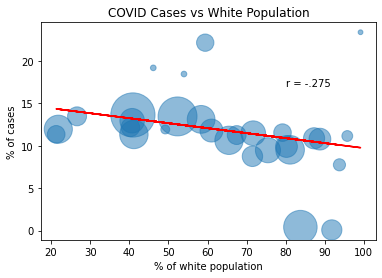

In [101]:
a = ethnicity_nbrs['pop_total']
plt.scatter('White', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('COVID Cases vs White Population')
plt.xlabel("% of white population")
plt.ylabel("% of cases")
x = ethnicity_nbrs['White']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 17, 'r = -.275')

plt.savefig('../Images/White_vs_cases.png')

###Ryan Hilber's Code

# a = df_all_2['pop']
# plt.scatter('perc_hs_grad_ormore', 'vac_by_perc', marker='o', data=df_all_2, s=a/50, alpha=.5)
# plt.title('Vaccines vs. Education Level')
# plt.xlabel("Percentage of population with a high school diploma")
# plt.ylabel('Percentage of population with at least one vaccine dose')
# x = df_all_2['perc_hs_grad_ormore']
# y = df_all_2['vac_by_perc']
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r-")
# plt.text(80, 70, 'r = .696')
# plt.savefig('hs_grad_vs_vac.png')

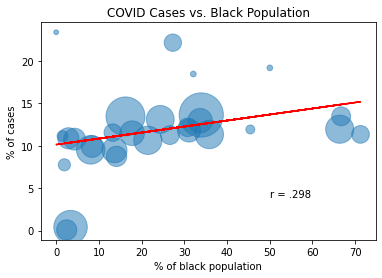

In [73]:
a = ethnicity_nbrs['pop_total']
plt.scatter('Black', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('COVID Cases vs. Black Population')
plt.xlabel("% of black population")
plt.ylabel("% of cases")
x = ethnicity_nbrs['Black']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(50, 4, 'r = .298')

plt.savefig('../Images/Black_vs_cases.png')


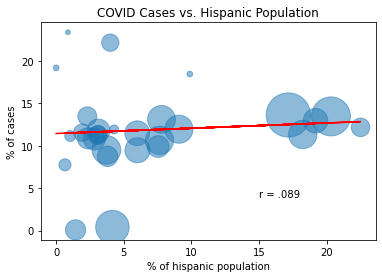

In [74]:
a = ethnicity_nbrs['pop_total']
plt.scatter('Hispanic', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('COVID Cases vs. Hispanic Population')
plt.xlabel("% of hispanic population")
plt.ylabel("% of cases")
x = ethnicity_nbrs['Hispanic']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(15, 4, 'r = .089')

plt.savefig('../Images/Hispanic_vs_Cases.png')


In [75]:
# sns.scatterplot(data=ethnicity_nbrs, x="White", y="cases")
# fig = plt.gcf()
# fig.set_size_inches(7, 7)
# labels=True

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(perc_covid['perc_of_pop'],perc_covid['cases'], color='hotpink')

#### Ethnicity vs. Vaccines Scatterplots

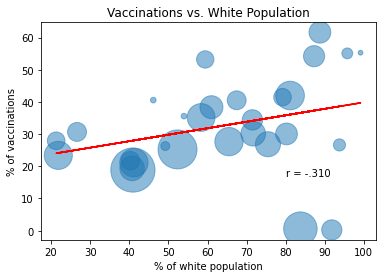

In [76]:
a = ethnicity_nbrs['pop_total']
plt.scatter('White', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Vaccinations vs. White Population')
plt.xlabel("% of white population")
plt.ylabel("% of vaccinations")
x = ethnicity_nbrs['White']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 17, 'r = -.310')

plt.savefig('../Images/White_vs_vaccinations.png')

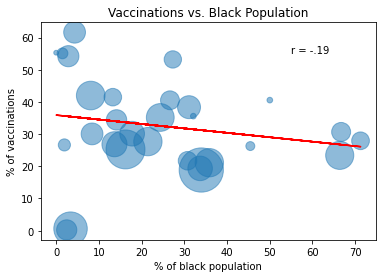

In [77]:
a = ethnicity_nbrs['pop_total']
plt.scatter('Black', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Vaccinations vs. Black Population')
plt.xlabel("% of black population")
plt.ylabel("% of vaccinations")
x = ethnicity_nbrs['Black']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(55, 55, 'r = -.19')

plt.savefig('../Images/Black_vs_vaccinations.png')

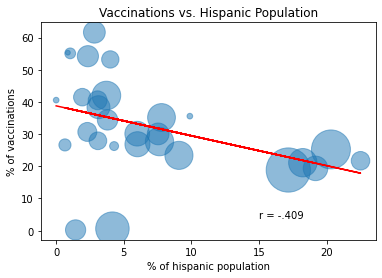

In [78]:
a = ethnicity_nbrs['pop_total']
plt.scatter('Hispanic', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Vaccinations vs. Hispanic Population')
plt.xlabel("% of hispanic population")
plt.ylabel("% of vaccinations")
x = ethnicity_nbrs['Hispanic']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(15, 4, 'r = -.409')

plt.savefig('../Images/Hispanic_vs_vaccinations.png')

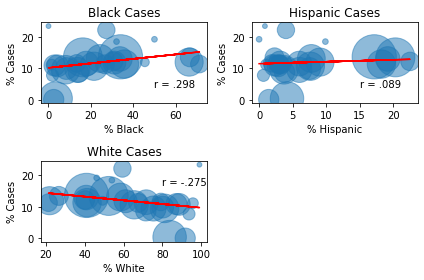

In [79]:
# fig, axs = plt.subplots(2, 2)

plt.subplot(2,2,1)
a = ethnicity_nbrs['pop_total']
plt.scatter('Black', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Black Cases')
plt.xlabel("% Black")
plt.ylabel("% Cases")
x = ethnicity_nbrs['Black']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(50, 4, 'r = .298')

plt.subplot(2,2,2)
a = ethnicity_nbrs['pop_total']
plt.scatter('Hispanic', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Hispanic Cases')
plt.xlabel("% Hispanic")
plt.ylabel("% Cases")
x = ethnicity_nbrs['Hispanic']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(15, 4, 'r = .089')

plt.subplot(2,2,3)
a = ethnicity_nbrs['pop_total']
plt.scatter('White', 'perc_cases', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('White Cases')
plt.xlabel("% White")
plt.ylabel("% Cases")
x = ethnicity_nbrs['White']
y = ethnicity_nbrs['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 17, 'r = -.275')

plt.tight_layout()

plt.savefig('../Images/ethnicity_cases.png')


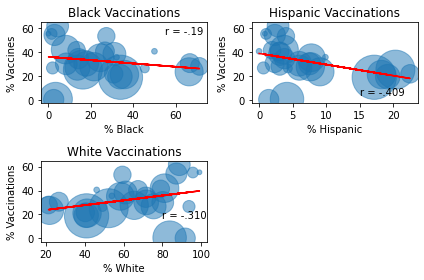

In [80]:
# fig, axs = plt.subplots(2, 2)

plt.subplot(2,2,1)
# plt.axes([.05, .5, .4, .4])
a = ethnicity_nbrs['pop_total']
plt.scatter('Black', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Black Vaccinations')
plt.xlabel("% Black")
plt.ylabel("% Vaccines")
x = ethnicity_nbrs['Black']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(55, 55, 'r = -.19')

plt.subplot(2,2,2)
# plt.axes([.525, .05, .4, .4])
a = ethnicity_nbrs['pop_total']
plt.scatter('Hispanic', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('Hispanic Vaccinations')
plt.xlabel("% Hispanic")
plt.ylabel("% Vaccines")
x = ethnicity_nbrs['Hispanic']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(15, 4, 'r = -.409')

plt.subplot(2,2,3)
# plt.axes([.05, .05, .4, .4])
a = ethnicity_nbrs['pop_total']
plt.scatter('White', 'perc_vacc', marker='o', data=ethnicity_nbrs, s=a/50, alpha=.5)
plt.title('White Vaccinations')
plt.xlabel("% White")
plt.ylabel("% Vaccinations")
x = ethnicity_nbrs['White']
y = ethnicity_nbrs['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 17, 'r = -.310')

plt.tight_layout()


plt.savefig('../Images/ethnicity_vaccines.png')


#### Pair Plot Comparisons

In [81]:
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(ethnicity_nbrs);

#### Load geospatial zips

In [82]:
zipcodes = gpd.read_file('zipcodes.geojson')
print(zipcodes.crs)
# zipcodes

epsg:4326


In [83]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


#### Merge Grouped DataFrames With Zips


In [84]:
vac_geo = zipcodes.merge(vaccine_df_g, how="inner", left_on='zip', right_on='zip')
covid_geo = zipcodes.merge(covid_df_g, how="inner", left_on='zip', right_on='zip')
c_v_geo = pd.merge(zipcodes, c_v_pop_zip_main, how="inner", on='zip')

In [85]:
vac_geo = vac_geo[['zip', 'shape_stlength', 'shape_starea', 'geometry', 'vacc']]

In [86]:
c_v_geo.sort_values('perc_of_pop', ascending=False, inplace=False)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop,z_n,n_z
39,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165,"MULTIPOLYGON (((-86.66517 36.09108, -86.66526 ...",Antioch,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37,37013\nAntioch,Antioch\n37013
38,37211,39,NASHVILLE,290587.58467925159,602215091.79736328,"MULTIPOLYGON (((-86.75696 36.13189, -86.75693 ...",Crieve Hall,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46,37211\nCrieve Hall,Crieve Hall\n37211
11,37027,43,BRENTWOOD,1235.5221063389981,38954.521423339844,"MULTIPOLYGON (((-86.73108 36.00985, -86.73153 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
4,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
5,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
6,37027,29,BRENTWOOD,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
7,37027,28,BRENTWOOD,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
8,37027,27,BRENTWOOD,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027
9,37027,44,BRENTWOOD,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",Brentwood,231,352.0,56117,0.41,0.63,7.19,0.03,0.05,37027\nBrentwood,Brentwood\n37027


In [87]:
# covid_zip.info()

In [88]:
# covid_zip.plot();

In [89]:
# vac_zip.plot();

#### COVID Map

In [90]:
# fig, ax = plt.subplots(figsize=(30,10))
# covid_geo.plot(column = 'cases',
#              cmap = 'GnBu', 
#              edgecolor = 'black',
#              ax = ax, 
#              legend=True)
# ax.axis('off');

#### Vaccine Map

In [91]:
# fig, ax = plt.subplots(figsize=(30,10))
# vac_geo.plot(column = 'vacc',
#              cmap = 'GnBu', 
#              edgecolor = 'black',
#              ax = ax, 
#              legend=True)
# ax.axis('off');

#### COVID AND Map

In [92]:
# For zip coordinates:

c_v_geo['coords'] = c_v_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
c_v_geo['coords'] = [coords[0] for coords in c_v_geo['coords']]

# c_v_geo.head()

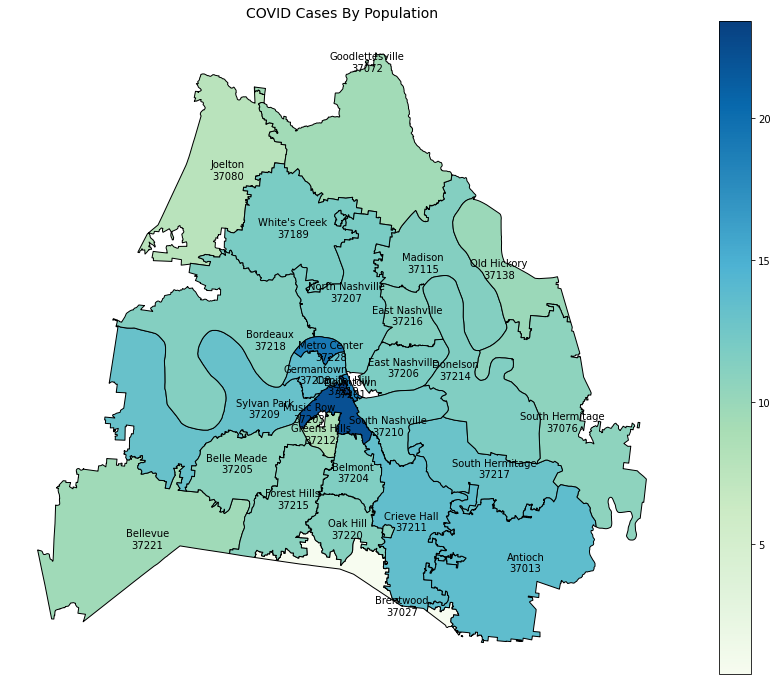

In [99]:
fig, ax = plt.subplots(figsize=(15,12))

q = c_v_geo.dissolve(by='zip', aggfunc='last')

for idx, row in q.iterrows():
    plt.annotate(text=row['n_z'], xy=row['coords'], horizontalalignment='center', verticalalignment='center', fontsize=10)

c_v_geo.plot(column = 'perc_cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True,
             label=True)
ax.axis('off')

# fig = px.choropleth(q, color="Bergeron",
#                     locations="district", featureidkey="properties.district",
#                     projection="mercator"
#                    );

# sm = plt.cm.ScalarMappable(cmap='GnBu')
# fig.colorbar(sm, fraction=0.036, pad=0, aspect = 17)
# # fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
ax.set_title('COVID Cases By Population', fontdict={'fontsize': '14', 'fontweight' : '3'})

plt.savefig('../Images/covid_cases_map.png')

# fig, ax = plt.subplots(figsize=(16,16))
# case_zip_map.plot(column = 'Cases',
#                   cmap=plt.cm.get_cmap('Reds'),
#                   edgecolor = 'black',
#                   legend=True,
#                   label=True,
#                   ax = ax)
# ax.axis('off')

# #this is the second part of the above code to get the zip labels to show up
# for idx, row in case_zip_map.iterrows():
#     plt.annotate(text=row['ZIP'], xy=row['coords'],horizontalalignment='center',fontsize=9)

#### Vaccine Map

No handles with labels found to put in legend.


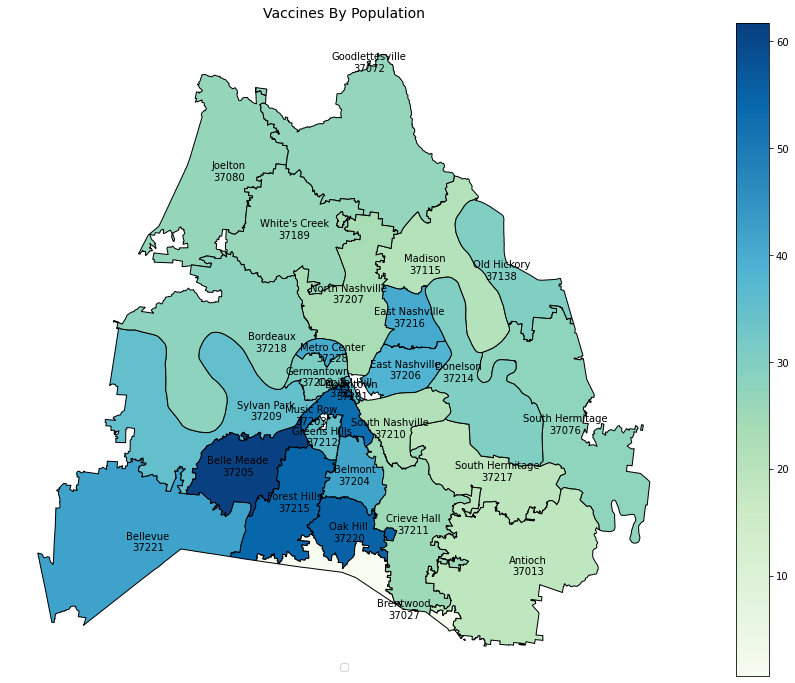

In [94]:
fig, ax = plt.subplots(figsize=(20,12))

q = c_v_geo.dissolve(by='zip', aggfunc='last')

for idx, row in q.iterrows():
    plt.annotate(text=row['n_z'], xy=row['coords'], horizontalalignment='center', verticalalignment='center', fontsize=10)

c_v_geo.plot(column = 'perc_vacc',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True,
             label=True)
ax.axis('off');
plt.legend(loc='lower center')

# sm = plt.cm.ScalarMappable(cmap='GnBu')
# fig.colorbar(sm, fraction=0.036, pad=0, aspect = 17)
# fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

ax.set_title('Vaccines By Population', fontdict={'fontsize': '14', 'fontweight' : '3'})

plt.savefig('../Images/covid_vaccinations_map.png')

#### Downtown Zips

In [95]:
c_v_geo.sort_values('pop_total')

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,neighborhood,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop,z_n,n_z,coords
26,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ...",Capitol Hill,270,638.0,1154,23.40,55.29,0.15,0.03,0.08,37219\nCapitol Hill,Capitol Hill\n37219,"(-86.78391171790555, 36.167747248268995)"
36,37228,13,NASHVILLE,38325.180077725185,47878303.581787109,"MULTIPOLYGON (((-86.78387 36.19400, -86.78318 ...",Metro Center,310,655.0,1615,19.20,40.56,0.21,0.04,0.08,37228\nMetro Center,Metro Center\n37228,"(-86.7949469133265, 36.1924909333415)"
32,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ...",Downtown,299,576.0,1619,18.47,35.58,0.21,0.04,0.07,37201\nDowntown,Downtown\n37201,"(-86.77806520890906, 36.165932790483495)"
22,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ...",White's Creek,479,1056.0,4016,11.93,26.29,0.51,0.06,0.14,37189\nWhite's Creek,White's Creek\n37189,"(-86.82872783514722, 36.2803248535275)"
40,37220,8,NASHVILLE,121112.34010755506,235801795.49957275,"MULTIPOLYGON (((-86.76043 36.08004, -86.76043 ...",Oak Hill,656,3239.0,5880,11.16,55.09,0.75,0.08,0.41,37220\nOak Hill,Oak Hill\n37220,"(-86.78068160922035, 36.06483109093)"
13,37080,32,JOELTON,258036.51004561348,868231536.13537598,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ...",Joelton,574,1970.0,7394,7.76,26.64,0.95,0.07,0.25,37080\nJoelton,Joelton\n37080,"(-86.8863290181254, 36.321650539235)"
12,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ...",Joelton,574,1970.0,7394,7.76,26.64,0.95,0.07,0.25,37080\nJoelton,Joelton\n37080,"(-86.8626194852792, 36.37924500470599)"
31,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ...",Music Row,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03,37203\nMusic Row,Music Row\n37203,"(-86.81420940322533, 36.148001630207)"
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",Belmont,1786,6410.0,15452,11.56,41.48,1.98,0.23,0.82,37204\nBelmont,Belmont\n37204,"(-86.77555016772823, 36.105530811982504)"
27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ...",Bordeaux,1785,4391.0,15721,11.35,27.93,2.01,0.23,0.56,37218\nBordeaux,Bordeaux\n37218,"(-86.8489055068381, 36.200088587521506)"


In [96]:
vac_geo_dt = zipcodes.merge(vaccine_df_g, how="inner", left_on='zip', right_on='zip')
covid_geo_dt = zipcodes.merge(covid_df_g, how="inner", left_on='zip', right_on='zip')

In [97]:
c_v_geo_dt = pd.merge(zipcodes, c_v_pop_zip, how="inner", on='zip')

In [98]:
# c_v_geo_dt = c_v_geo_dt[c_v_geo_dt['zip'] == '37213', '37219', '37228', '37201']
# c_v_geo_dt = c_v_geo_dt.loc[c_v_geo_dt['zip'] == '37213', '37219', '37228', '37201']
c_v_geo_dt = c_v_geo_dt.loc[c_v_geo_dt['zip'] == (['37213', '37219', '37228', '37201'])]
# women = cd.loc[cd.title_desc.isin(['MRS','MISS','MS']), 'SALES'

ValueError: ('Lengths must match to compare', (42,), (4,))

*** Explore sum in group by ***

In [ ]:
covid_df_my = pd.to_datetime(covid_df_my.month_year)

In [ ]:
# covid_df_my = covid_df_my.sort_values(['zip', 'month_year'])

In [ ]:
print(covid_df_my.head(20))

In [ ]:
# plt.scatterplt('')

In [ ]:
c_my_g.describe()

In [ ]:
plt.bar('month_year', 'cases', data = covid_df_my)
plt.ylim(0, 300)
plt.xticks(rotation = 70)
plt.title('');

In [ ]:
v_my_g.describe()

In [ ]:
c_my_g.describe()

In [ ]:
vaccine_df_by_zip = vaccine_df.groupby('zip')
covid_df_by_zip = covid_df.groupby('zip')

In [ ]:
vaccine_df_by_date = vaccine_df.groupby('date')
covid_df_by_zip_date = covid_df.groupby('date')

In [ ]:
vaccine_df_by_date['month'] = vaccine_df_by_date['date'].dt.month

In [ ]:
vaccine_df.info()

In [ ]:
covid_df_by_zip.describe()

In [ ]:
vaccine_df_by_date.describe()

### Reading Metadata function. From Joshua Rio-Ross
#### Basically, each table’s metadata.json is a dictionary with subdictionaries (as I’m sure you already saw), so I wrote a function that drills down to the right depth and gets each column name and stores it in a list in order, then finally it uses that list to rename the columns in the geodataframe/dataframe.
##### One important thing: The tablename is the Census Reporter name that you see in the top left part of the page and that’s at the beginning of all the column names. So it’s a string that’s something like “B09001” or whatever.

In [ ]:
def metarename(file, metadata, tablename):
    """Given a Census Reporter file and its metadata, rename all imported DataFrame columns."""
    name_list = ["geoid", "zip"]
    for i in metadata["tables"][tablename]["columns"].items():
        col_name = i[1]["name"]
        col_name_error = i[1]["name"]+" error"
        name_list.append(col_name)
        name_list.append(col_name_error)
    name_list.append("geometry")
    file.columns = name_list
    return file

# Read in GeoDataFrame from geojson
eth_geo_df = gpd.read_file('../data/ethnicity_geojson/ehtnicity_geo.geojson')
# Read in metadata DataFrame from json using json package
er_md = open('../data/ethnicity_geojson/metadata.json')
eth_race_meta = json.load(er_md)
# Run function using table name "B03002"
metarename(eth_geo_df, eth_race_meta, "B03002")